In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

In [10]:
file = "../code/data/next_gen_exps.times"
df = pd.read_csv(file)
df.inst = df.inst.str[:-4]
print(df)

# convert to ms
df['time-ms'] = df.time/1000

                 inst       type  iter           alg      stage     time
0     fb-pages-tvshow  construct     0        Dinics  construct      601
1     fb-pages-tvshow  construct     0     DinicsOPT  construct      612
2     fb-pages-tvshow  construct     0   PushRelabel  construct     1701
3     fb-pages-tvshow  construct     0  BK-Algorithm  construct      468
4     fb-pages-tvshow        low     0        Dinics       init       73
...               ...        ...   ...           ...        ...      ...
2435            brain         gh     5  BK-Algorithm       flow  1175687
2436            brain         gh     6  BK-Algorithm       flow  1173674
2437            brain         gh     7  BK-Algorithm       flow  1197557
2438            brain         gh     8  BK-Algorithm       flow  1939455
2439            brain         gh     9  BK-Algorithm       flow   258730

[2440 rows x 6 columns]


# all times are in us (seconds * 1e-6)

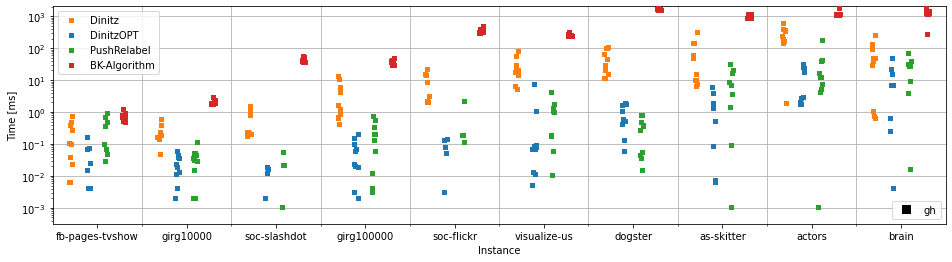

In [18]:
shape = {
    #'low': '*',
    #'high': 'o',
    'gh': 's'
}

colors = {'DinicsOPT': 'C0','Dinics': 'C1','PushRelabel': 'C2','BK-Algorithm': 'C3'}
labels = ['Dinitz', 'DinitzOPT', 'PushRelabel', 'BK-Algorithm']

fig, ax = plt.subplots(figsize=(16,4))

filtered = df[df.stage=='flow']
filtered = filtered[filtered.type=='gh']

first = True
for t, type_data in filtered.groupby('type'):
    ax = sns.stripplot(x='inst', y='time-ms', data=type_data, hue='alg', marker=shape[t], dodge=True, palette=colors)
    if first:
        leg1 = ax.legend(loc='upper left', labels=labels)
        ax.add_artist(leg1)
        first = False

ax.legend(loc='lower right', handles=[matplotlib.lines.Line2D([0], [0],marker=shape[t], color='w', label=t, markerfacecolor='k', markersize=10) for t in shape.keys()])

ax.set_ylabel('Time [ms]')
ax.set_xlabel('Instance')
ax.set_ylim(10**-3.5, ax.get_ylim()[1])
ax.semilogy()

# grid and size
num_inst = df.inst.nunique()
ax.set_xticks([x+0.5 for x in range(0,num_inst-1)], minor=True)
ax.set_xlim(-0.5, num_inst-0.5)
ax.grid(which='minor', axis='x')
ax.grid(which='major', axis='y')

plt.savefig('eval_runtime_gh.pdf', bbox_inches='tight')
plt.show()